# I have used libraries here

* MEDV will be chosen as dependent variable.
* Then, I plotted the heatmap for correlation matrix to see the greatest correlations.
* I plotted Pair Plots of MEDV and Selected Predictors


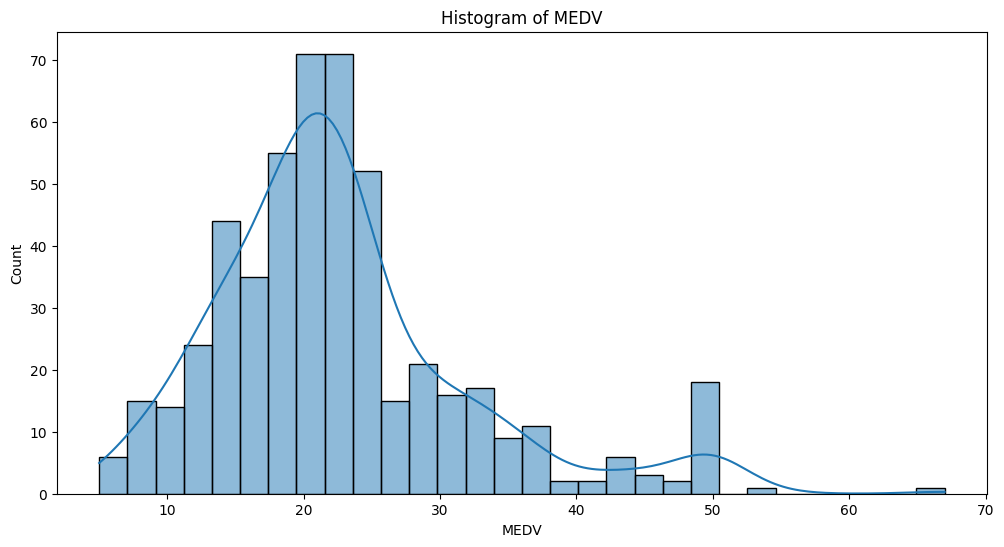

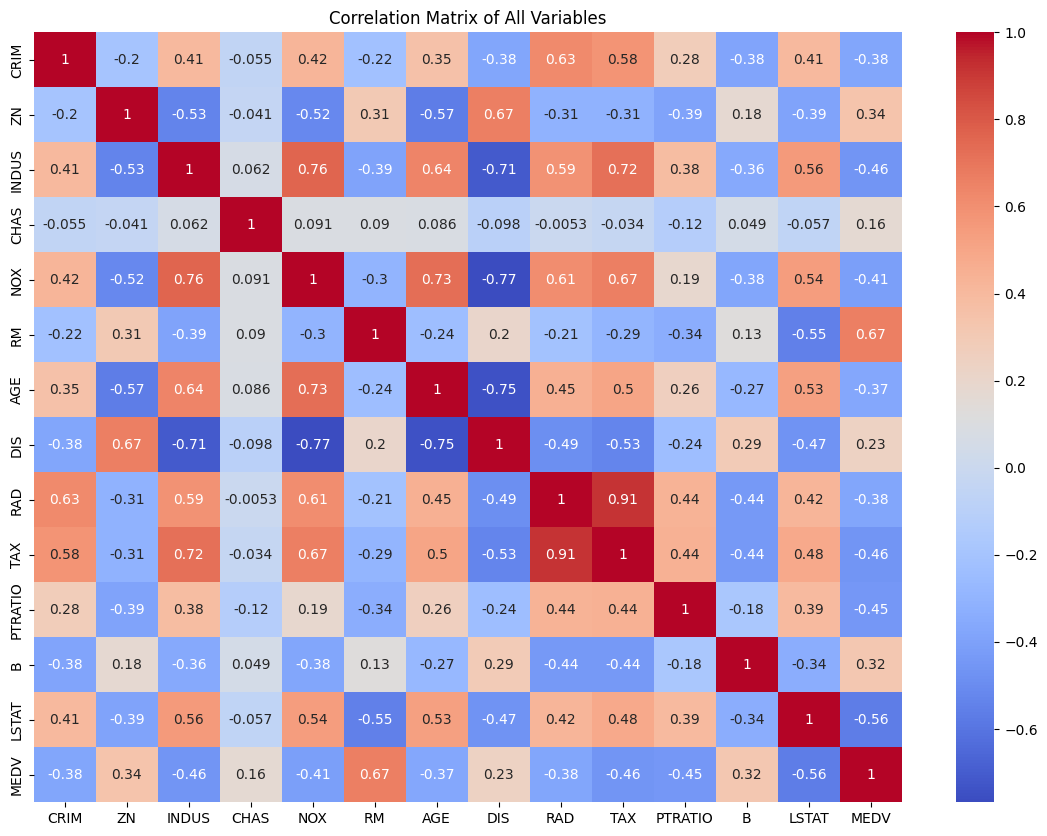

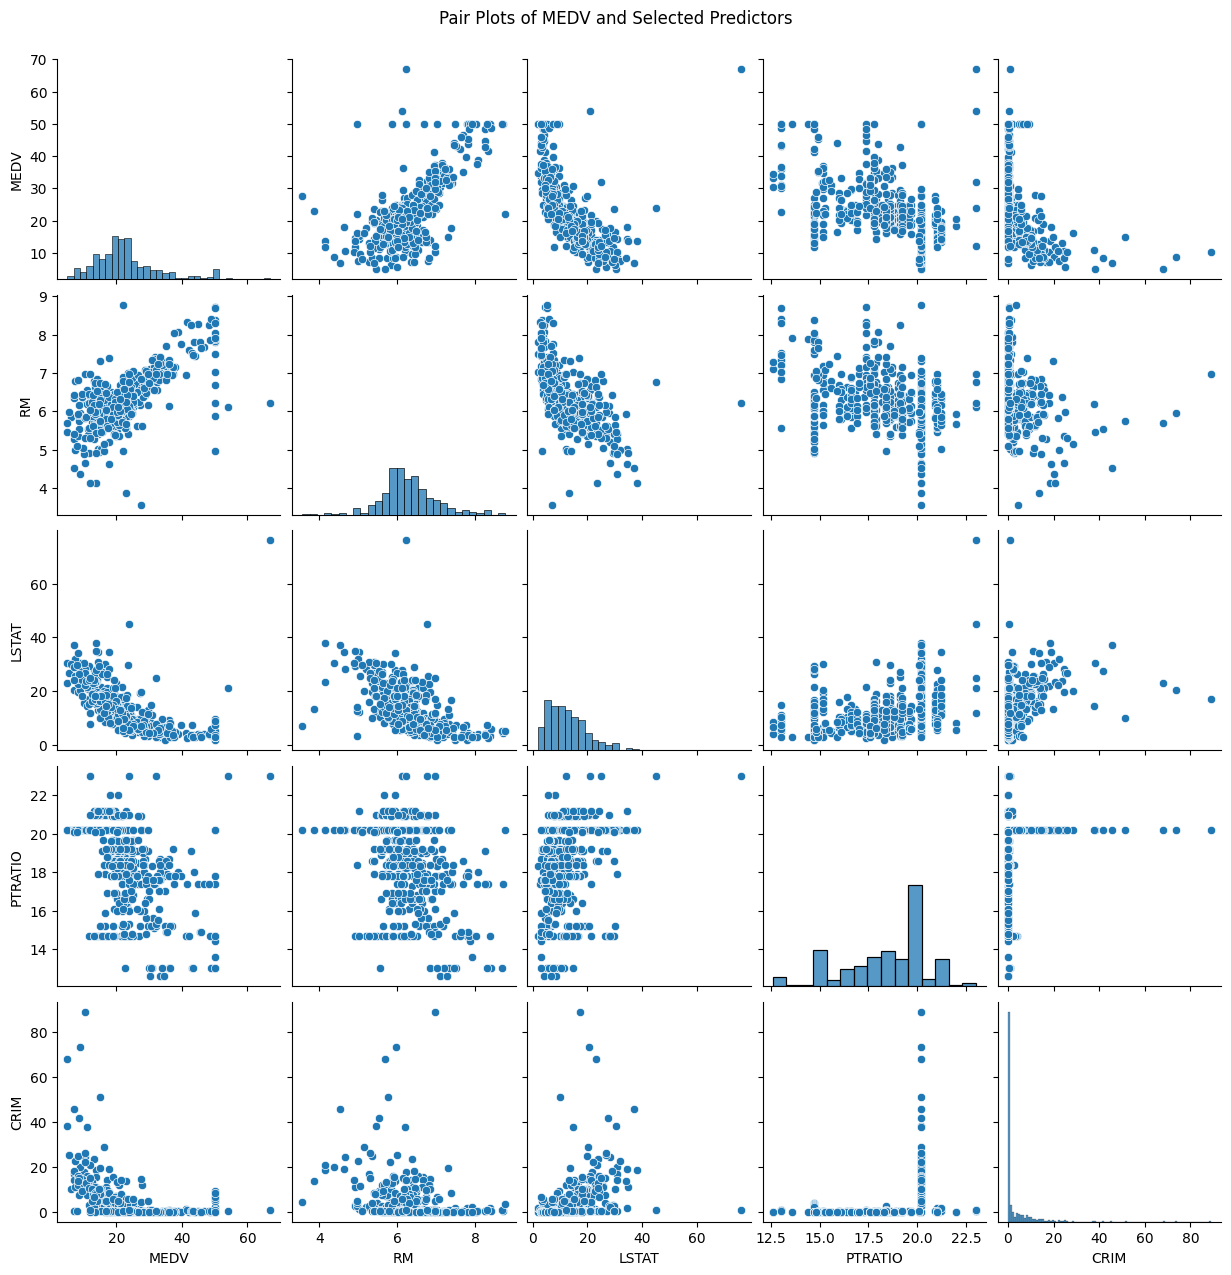

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data.csv')  # Make sure to update the path

# Visualizing the distribution of MEDV
plt.figure(figsize=(12, 6))
sns.histplot(data['MEDV'], kde=True, bins=30)
plt.title('Histogram of MEDV')


# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

# Pair plots for MEDV against other significant predictors
# Selecting a few potentially interesting variables
selected_columns = ['MEDV', 'RM', 'LSTAT', 'PTRATIO', 'CRIM']
sns.pairplot(data[selected_columns])
plt.suptitle('Pair Plots of MEDV and Selected Predictors', y=1.02)
plt.show()

* I checked the "Homoscedasticity" by plotting residuals versus fitted values. They seem to be distributed almost uniformly and its fitted values lay on the red line. This shows the linearity test is succesful.
* To test normality QQ is plotted and Shapiro-Wilk test is done. It can be seen that normality condition is met.:

Statistic: 0.9631683826446533

P-value: 0.0057670604437589645


* Durbin-Watson test is done to test independence.



ANOVA TABLE:

                 sum_sq     df          F        PR(>F)
DIS       223553.333513    1.0  635.25481  1.383928e-91
Residual  179122.841673  509.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     635.3
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.38e-91
Time:                        19:36:35   Log-Likelihood:                -2222.2
No. Observations:                 511   AIC:                             4448.
Df Residuals:                     509   BIC:                             4457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std

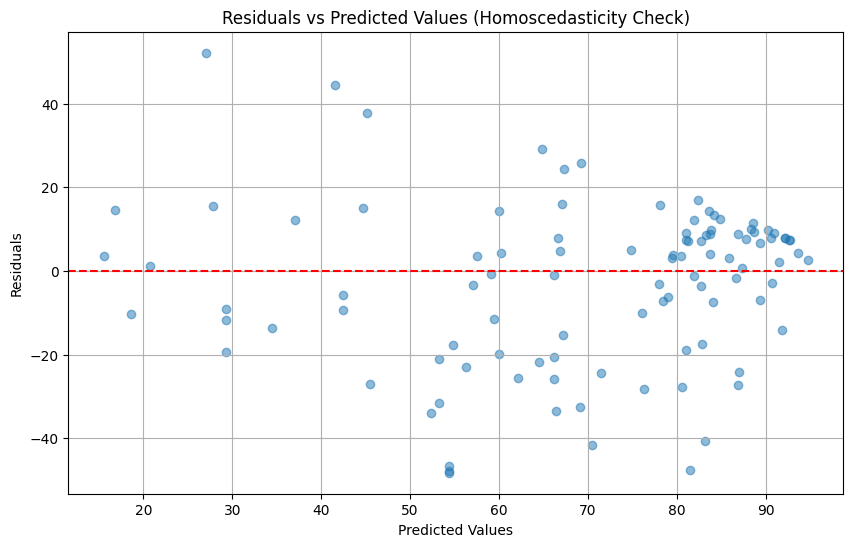

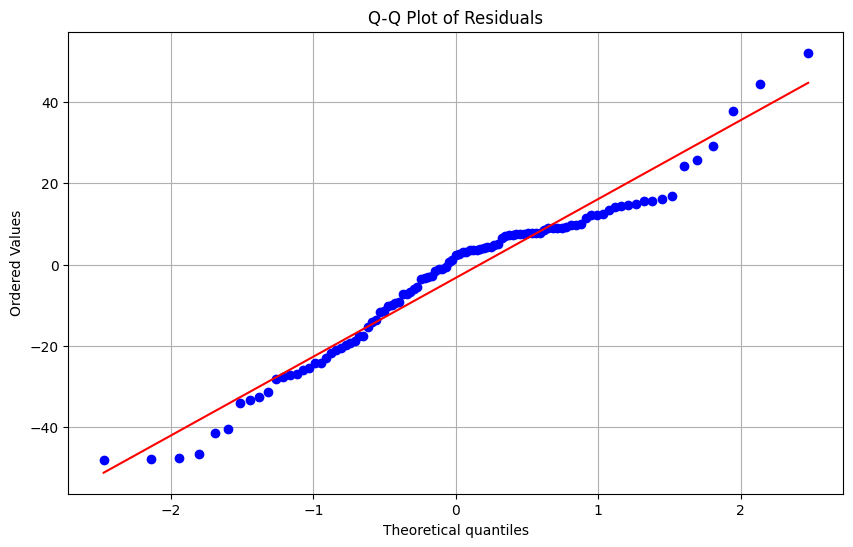

Shapiro-Wilk Test:
Statistic: 0.9631683826446533
P-value: 0.0057670604437589645


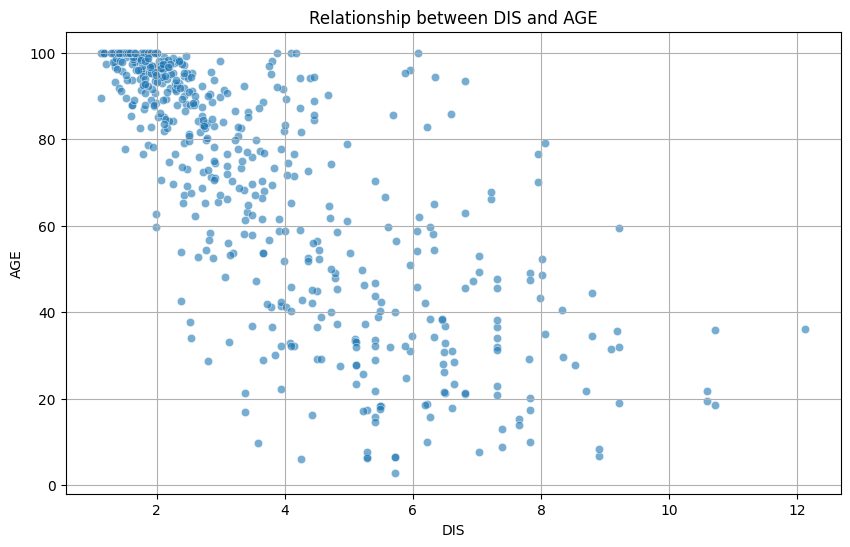

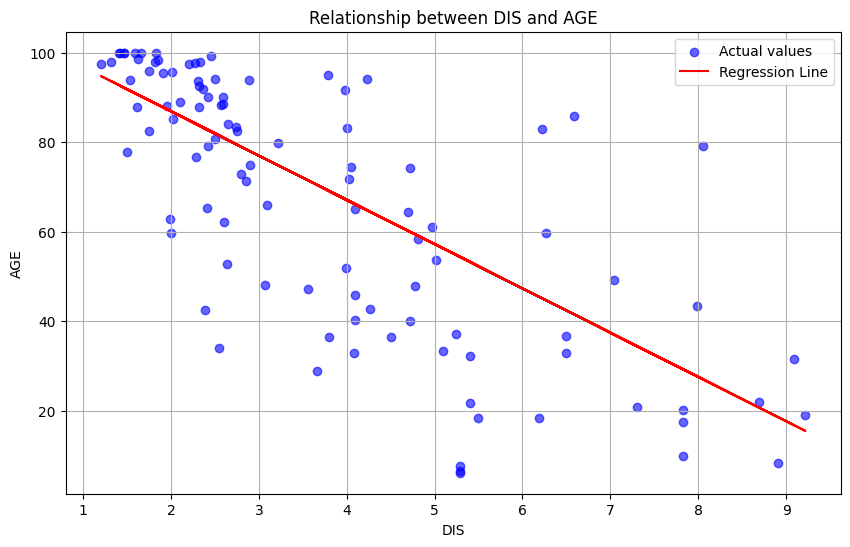

Slope (Coefficient of RAD): -9.885821798001855
Intercept: 106.6801591723092
R² (Coefficient of Determination): 0.5341054955156599
Mean Squared Error (MSE): 386.9474805018245
The regression equation is: AGE = 106.68 + -9.89*DIS
Pearson correlation coefficient: -0.745096644711957


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the dataset
data_path = 'data.csv'  # Update this path to where your dataset is stored
data = pd.read_csv(data_path)

x_name = 'DIS'
y_name = 'AGE'

x = data[x_name]
y = data[y_name]

# Filter out outliers
data_filtered = data


# Handle missing values if any
data_filtered[x_name].fillna(data[x_name].median(), inplace=True)
data[y_name].fillna(data[y_name].median(), inplace=True)

# Create the model for ANOVA and hypothesis testing
formula = f'{y_name} ~ {x_name}'
model = ols(formula, data=data).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA TABLE:\n")
print(anova_table)

# Model summary which includes R-squared and coefficients
print(model.summary())

# Define independent and dependent variables
X = data_filtered[[x_name]]
y = data_filtered[y_name ]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target variable on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals to check homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Plotting Q-Q plot to check for normality of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# Performing the Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test.statistic)
print("P-value:", shapiro_test.pvalue)



# Plotting the relationship between 'RAD' and 'TAX' after removing outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_name, y=y_name, data=data_filtered, alpha=0.6)
plt.title(f'Relationship between {x_name} and {y_name}')
plt.xlabel(f'{x_name}')
plt.ylabel(f'{y_name}')
plt.grid(True)
plt.show()


# Define independent and dependent variables
X = data_filtered[[x_name]]
y = data_filtered[y_name ]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Visualize the regression line over the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values', alpha=0.6)
plt.plot(X_test, y_pred, '-r', label='Regression Line')
plt.title(f'Relationship between {x_name} and {y_name}')
plt.xlabel(f'{x_name}')
plt.ylabel(f'{y_name}')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R^2 and Mean Squared Error (MSE) for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the model's parameters and performance metrics
print("Slope (Coefficient of RAD):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² (Coefficient of Determination):", r2)
print("Mean Squared Error (MSE):", mse)


slope = model.coef_[0]
intercept = model.intercept_
print(f"The regression equation is: AGE = {intercept:.2f} + {slope:.2f}*DIS")

correlation = data_filtered[x_name].corr(data_filtered[y_name])
print("Pearson correlation coefficient:", correlation)


# These are the functions ı wrote from scratch.

SS_i(x): 437.2823840091262
SS_i(y): 85546.38466019405
beta coefficients (beta1, beta0): (-10.354299313038485, 105.19009231066948)
SSE: 38664.67810960877
MSE: 382.81859514464134
avg_squared_residual(x,y):  382.81859514464134
R²: 0.5480267428811643
t_test(x,y):  -0.5655990624632564


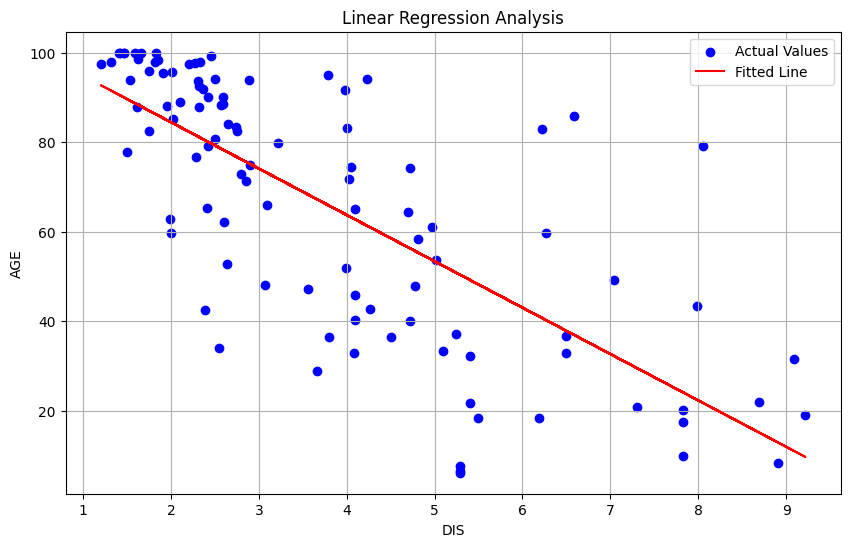

lilliefors_result (test_stat, p_val):  (0.10701640918216515, 0.006263369431062706)
White's test: statistic=12.54553050639901, p-value=0.0018870033199835864


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('data.csv')  # Update the path accordingly

# Assuming 'DIS' and 'AGE' are the columns of interest
x_name = 'DIS'
y_name = 'AGE'

# Prepare the data
X = data[[x_name]].values  # Ensure X is 2D
y = data[y_name].values    # Ensure y is 1D

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert X_test to 1D for compatibility in custom functions
x = X_test.flatten()
y = y_test

def SS_i(arr):
    return np.sum(np.power(arr, 2)) - np.power(np.sum(arr), 2) / len(arr)

def SS_ij(x, y):
    return np.dot(x, y) - (np.sum(x) * np.sum(y)) / len(x)

def beta(x, y):
    beta1 = SS_ij(x, y) / SS_i(x)
    beta0 = np.mean(y) - beta1 * np.mean(x)
    return beta1, beta0

def residual(x,y):
  y_hat = beta(x,y)[0]*x + beta(x,y)[1]
  e = y_hat - y
  return e

def SSE(x, y):
    b1, b0 = beta(x, y)
    y_hat = b1 * x + b0
    return np.sum(np.power((y_hat - y), 2))

def MSE(x, y):
    return SSE(x, y) / (len(x) - 2)

def avg_squared_residual(x,y):
  s_e = np.sum(np.power(residual(x,y),2))/(len(x)-2)
  return s_e

def R2(x, y):
    sse = SSE(x, y)
    sst = np.sum((y - np.mean(y))**2)
    return 1 - sse / sst

def t_test(x,y):
  s_beta1 = avg_squared_residual(x,y)/np.sqrt(SS_i(x))
  t = (beta(x,y)[0] - 0)/s_beta1
  return t

def prediction(x,y,xg):
  pred = beta(x,y)[0]*xg + beta(x,y)[1]


# Outputs
print("SS_i(x):", SS_i(x))
print("SS_i(y):", SS_i(y))
print("beta coefficients (beta1, beta0):", beta(x, y))
print("SSE:", SSE(x, y))
print("MSE:", MSE(x, y))
print("avg_squared_residual(x,y): ",avg_squared_residual(x,y))
print("R²:", R2(x, y))
print("t_test(x,y): ",t_test(x,y))


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Values')
plt.plot(x, beta(x, y)[0] * x + beta(x, y)[1], '-r', label='Fitted Line')
plt.title('Linear Regression Analysis')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.legend()
plt.grid(True)
plt.show()


# Example residuals, normally distributed for the example
residuals = residual(x,y)

# Perform Lilliefors test
lilliefors_result = sm.stats.lilliefors(residuals,dist= "norm")
test_stat, p_val = lilliefors_result
# Print the results of the Lilliefors test
print("lilliefors_result (test_stat, p_val): ",lilliefors_result)

# White's Test
x_with_intercept = sm.add_constant(x)
model = sm.OLS(y, x_with_intercept).fit()
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residual(x,y), model.model.exog)
print(f"White's test: statistic={white_test[0]}, p-value={white_test[1]}")